Importing the Dependencies


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn==1.3.0

  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


Data Collection and Analysis

Diabetes Dataset

In [ ]:
pip install --upgrade scikit-learn==1.3.2


  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
diabetes_dataset = pd.read_csv('/content/Diabetes.update.csv')

In [ ]:
#printing first 5 rows of dataset
diabetes_dataset.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,2,83,65,28,66,36.8,0.629,24,0
8,2,89,90,30,0,33.5,0.292,42,0
9,4,99,68,38,0,32.8,0.145,33,0


In [ ]:
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1594,1,79,60,42,48,43.5,0.678,23,0
1595,2,75,64,24,55,29.7,0.370,33,0
1596,6,85,78,0,0,31.2,0.382,42,0
1597,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
#printing rows and columns in dataset
diabetes_dataset.shape

(1599, 9)

In [ ]:
#statistical measure of data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,2.353971,118.929331,67.843652,20.942464,81.290181,32.062539,0.466383,30.351470,0.287680
std,1.885929,31.304122,19.200688,15.933189,109.535158,8.364620,0.328103,10.745796,0.452823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,98.000000,62.000000,0.000000,0.000000,27.200000,0.243000,23.000000,0.000000
50%,2.000000,115.000000,70.000000,23.000000,49.000000,32.000000,0.365000,27.000000,0.000000
75%,4.000000,137.000000,78.000000,32.000000,130.000000,36.600000,0.605000,33.000000,1.000000
max,6.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,72.000000,1.000000


In [ ]:
#Counting no.of 0,1 in dataset
diabetes_dataset['Outcome'].value_counts()

0    1139
1     460
Name: Outcome, dtype: int64

0->Non-Diabetic

1->Diabetic

In [ ]:
#finding mean of Outcome
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.271291,110.104478,66.999122,20.416155,75.069359,30.562248,0.439122,28.814750
1,2.558696,140.780435,69.934783,22.245652,96.693478,35.777391,0.533885,34.156522


In [ ]:
#separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
X[0:1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47


In [ ]:
X.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
5,0,173,78,32,265,46.5,1.159,58
6,4,99,72,17,0,25.6,0.294,28
7,2,83,65,28,66,36.8,0.629,24
8,2,89,90,30,0,33.5,0.292,42
9,4,99,68,38,0,32.8,0.145,33


In [ ]:
X.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1579,2,99,52,15,94,24.6,0.637,21
1580,1,109,56,21,135,25.2,0.833,23
1581,2,88,74,19,53,29.0,0.229,22
1582,4,151,90,38,0,29.7,0.294,36
1583,0,114,80,34,285,44.2,0.167,27
1584,2,100,64,23,0,29.7,0.368,21
1585,0,131,88,0,0,31.6,0.743,32
1586,6,104,74,18,156,29.9,0.722,41
1587,3,148,66,25,0,32.5,0.256,22
1588,4,120,68,0,0,29.6,0.709,34


In [ ]:
print(Y.head(20))
Y.tail(20)

0     1
1     0
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: Outcome, dtype: int64


1579    0
1580    0
1581    0
1582    0
1583    0
1584    0
1585    1
1586    1
1587    0
1588    0
1589    0
1590    0
1591    1
1592    1
1593    0
1594    0
1595    0
1596    0
1597    1
1598    0
Name: Outcome, dtype: int64

Data Standardization

In [ ]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
st_data = scaler.transform(X)

In [ ]:
print(st_data)

[[-0.18774935  0.60939691 -0.3044412  ...  0.18386272 -1.03470383
   1.54979104]
 [-1.24856637 -1.11615518  0.73751403 ...  0.73397006 -0.71153359
  -0.68433919]
 [-1.24856637  0.83307959 -3.53450242 ...  1.45150137  0.49883046
   0.06037088]
 ...
 [ 1.93388468 -1.08420051  0.52912298 ... -0.1031498  -0.25726597
   1.08434724]
 [-1.24856637  0.32180489  2.19625135 ...  4.1900792  -0.44933885
  -0.40507291]
 [-0.18774935 -1.21201919  0.21653641 ... -0.23469721  0.24578206
  -0.49816167]]


In [ ]:
print(st_data[0:1])
import pandas as pd
# Your data
array=[[-0.18774935,  0.60939691, -0.3044412 ,  0.88255612, -0.74236998,
         0.18386272, -1.03470383,  1.54979104]]

df =pd.DataFrame(array,columns=['Pregnencies', 'Glucose','SkinThickness','BloodPressire', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
 'Age'])
# Print the data in one row of the table
print(df.to_string(index=False))

[[-0.18774935  0.60939691 -0.3044412   0.88255612 -0.74236998  0.18386272
  -1.03470383  1.54979104]]
 Pregnencies  Glucose  SkinThickness  BloodPressire  Insulin      BMI  DiabetesPedigreeFunction      Age
   -0.187749 0.609397      -0.304441       0.882556 -0.74237 0.183863                 -1.034704 1.549791


In [ ]:
X = st_data
Y = diabetes_dataset['Outcome']

In [ ]:
#printing X,Y after data is standardized
print(Y)
X

0       1
1       0
2       1
3       1
4       0
       ..
1594    0
1595    0
1596    0
1597    1
1598    0
Name: Outcome, Length: 1599, dtype: int64


array([[-0.18774935,  0.60939691, -0.3044412 , ...,  0.18386272,
        -1.03470383,  1.54979104],
       [-1.24856637, -1.11615518,  0.73751403, ...,  0.73397006,
        -0.71153359, -0.68433919],
       [-1.24856637,  0.83307959, -3.53450242, ...,  1.45150137,
         0.49883046,  0.06037088],
       ...,
       [ 1.93388468, -1.08420051,  0.52912298, ..., -0.1031498 ,
        -0.25726597,  1.08434724],
       [-1.24856637,  0.32180489,  2.19625135, ...,  4.1900792 ,
        -0.44933885, -0.40507291],
       [-0.18774935, -1.21201919,  0.21653641, ..., -0.23469721,
         0.24578206, -0.49816167]])

TrainTest Split

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and combined validation/testing sets (80% train, 20% val/test)
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)
# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_validation:", Y_validation.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (1279, 8)
Shape of X_validation: (160, 8)
Shape of X_test: (160, 8)
Shape of Y_train: (1279,)
Shape of Y_validation: (160,)
Shape of Y_test: (160,)


K-Fold Cross Validation


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Create an instance of the SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear', C=1)
# Combine the training and validation sets for cross-validation
X_combined = np.concatenate((X_train, X_validation), axis=0)
Y_combined = np.concatenate((Y_train, Y_validation), axis=0)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score


# Perform K-fold cross-validation and get predicted labels for each fold
cv_predicted_labels = cross_val_predict(classifier, X_combined, Y_combined, cv=kf)


Histogram

<Axes: ylabel='Frequency'>

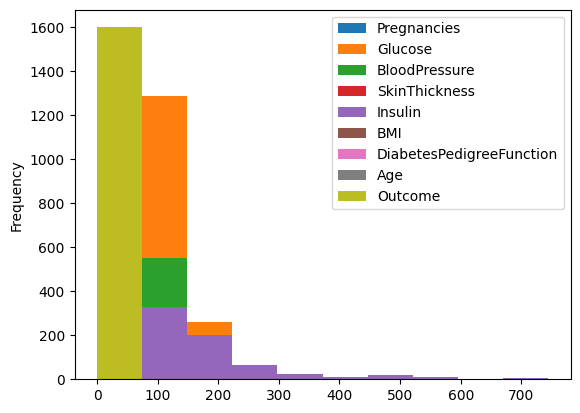

In [ ]:
diabetes_dataset.plot(kind='hist')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

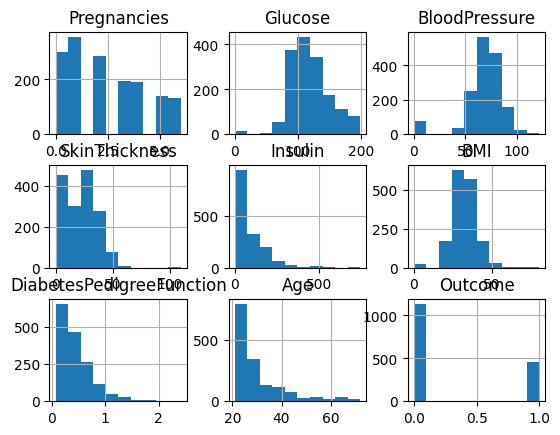

In [ ]:
diabetes_dataset.hist()

Scatter Plot

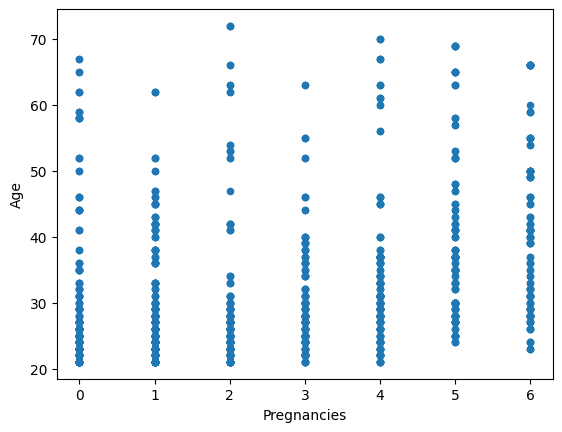

In [ ]:
diabetes_dataset.plot(kind='scatter',x='Pregnancies',y='Age')
plt.show()

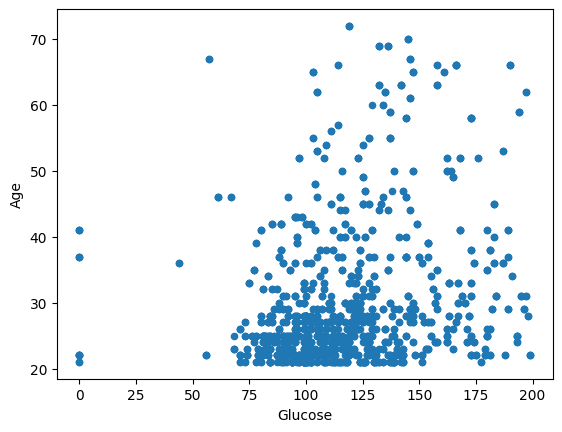

In [ ]:
diabetes_dataset.plot(kind='scatter',x='Glucose',y='Age')
plt.show()

Training the Model

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


support vector mechine

In [ ]:
 #training the support vector mechine Classifier
from sklearn.svm import SVC
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
#adv:High Accuracy,Robustness to Overfitting
#dis:Sensitivity to Parameter Tuning,Limited Scalability


SVC(kernel='linear')

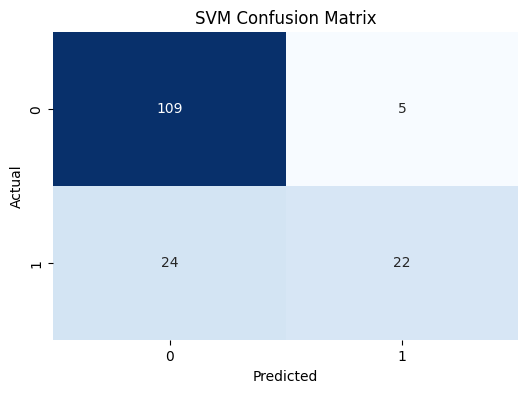

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix using heatmap
def plot_conf_matrix_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# SVM Confusion Matrix
svm_y_pred = classifier.predict(X_test)
plot_conf_matrix_heatmap(Y_test, svm_y_pred, "SVM Confusion Matrix")

# Logistic Regression Confusion Matrix
#lr_y_pred = classifier.predict(X_test)
#plot_conf_matrix_heatmap(Y_test, lr_y_pred, "Logistic Regression Confusion Matrix")

# KNN Confusion Matrix
# Uncomment the lines below if you want to plot the KNN confusion matrix
# knn_y_pred = knn_classifier.predict(X_test)
# plot_conf_matrix_heatmap(Y_test, knn_y_pred, "KNN Confusion Matrix")

# CNN Confusion Matrix
# Replace 'cnn_y_pred' with the predictions of your CNN classifier
# plot_conf_matrix_heatmap(Y_test, cnn_y_pred, "CNN Confusion Matrix")


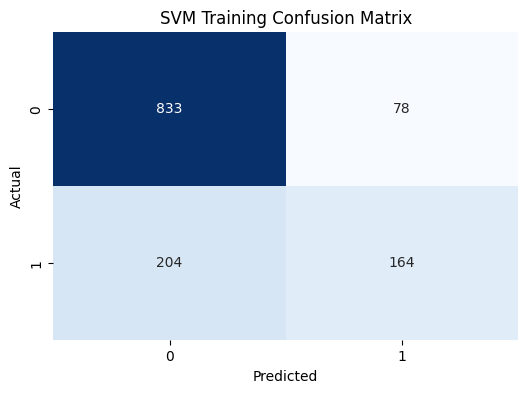

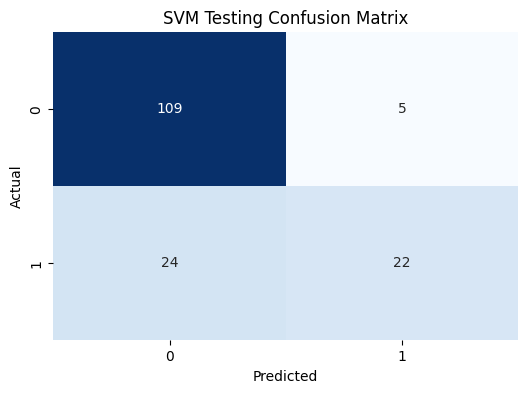

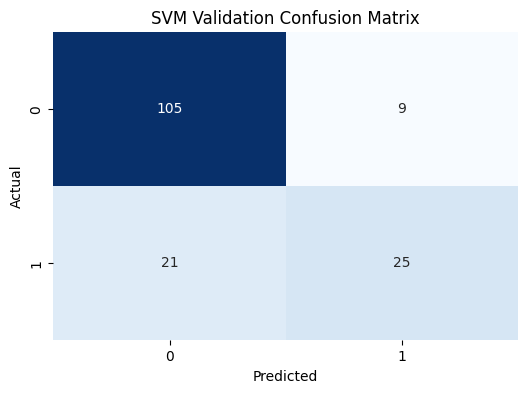

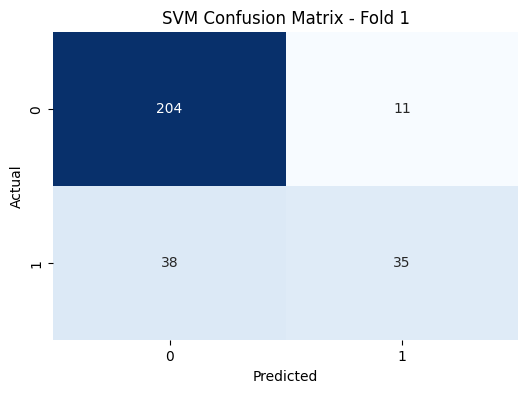

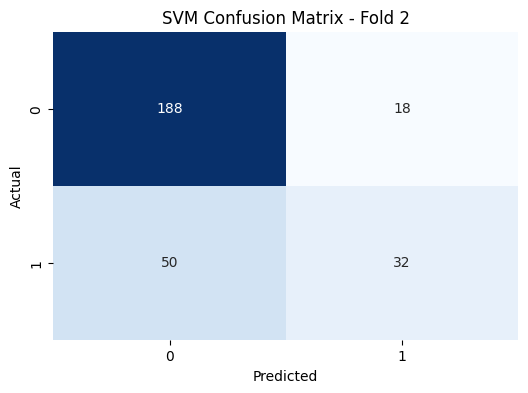

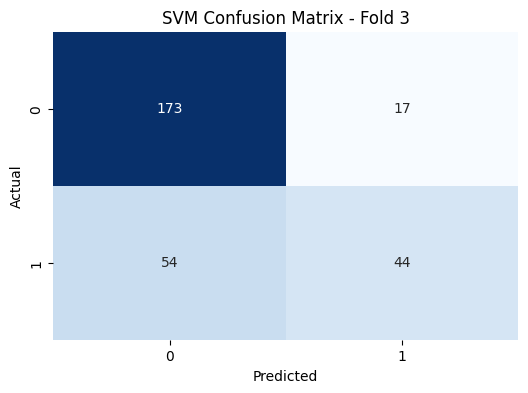

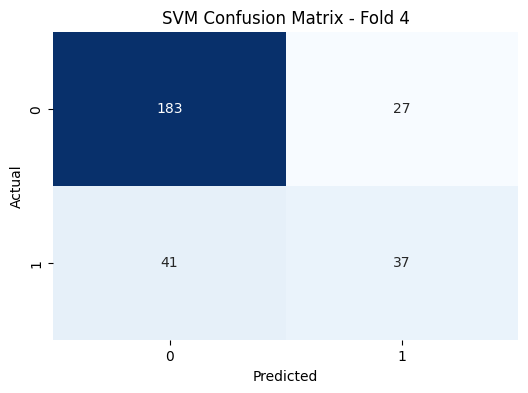

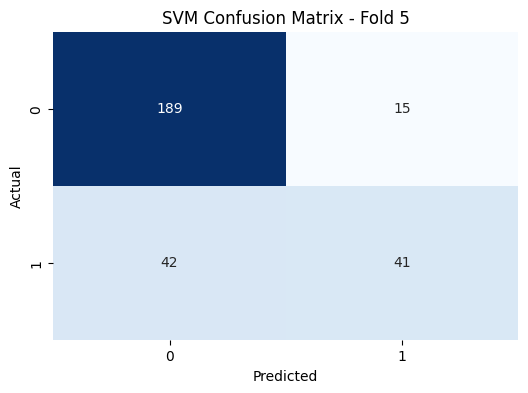

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix using heatmap
def plot_conf_matrix_heatmap(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Train the SVM model
classifier.fit(X_train, Y_train)

# SVM Confusion Matrix - Training
svm_train_pred = classifier.predict(X_train)
plot_conf_matrix_heatmap(Y_train, svm_train_pred, "SVM Training Confusion Matrix")

# SVM Confusion Matrix - Testing
svm_test_pred = classifier.predict(X_test)
plot_conf_matrix_heatmap(Y_test, svm_test_pred, "SVM Testing Confusion Matrix")

# SVM Confusion Matrix - Validation
svm_validation_pred = classifier.predict(X_validation)
plot_conf_matrix_heatmap(Y_validation, svm_validation_pred, "SVM Validation Confusion Matrix")

# K-Fold Cross Validation Confusion Matrices
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)
for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

    classifier.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = classifier.predict(X_test_fold)

    # Plot confusion matrix for each fold
    plot_conf_matrix_heatmap(Y_test_fold, Y_pred_fold, f"SVM Confusion Matrix - Fold {i+1}")


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
diabetes_dataset = pd.read_csv('/content/Diabetes.update.csv')

# Separate the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
X_standardized = scaler.transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.2, stratify=Y, random_state=2)

# Create a logistic regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the testing data
Y_test_prediction = classifier.predict(X_test)

# Calculate probability predictions
probability_predictions = classifier.predict_proba(X_test)[:, 1]

# Print or use probability predictions as needed
print("Probability Predictions:")
print(probability_predictions)

# Evaluate the classifier
accuracy_test = accuracy_score(Y_test, Y_test_prediction)
precision_test = precision_score(Y_test, Y_test_prediction)
recall_test = recall_score(Y_test, Y_test_prediction)
f1_test = f1_score(Y_test, Y_test_prediction)
confusion_matrix_test = confusion_matrix(Y_test, Y_test_prediction)

# Print evaluation metrics
print('Accuracy score on the testing data:', accuracy_test)
print('Precision score on the testing data:', precision_test)
print('Recall score on the testing data:', recall_test)
print('F1 score on the testing data:', f1_test)
print('Confusion matrix on the testing data:')
print(confusion_matrix_test)


Probability Predictions:
[0.13701003 0.40661617 0.0100217  0.09276172 0.14688759 0.22348051
 0.81010853 0.14858619 0.00854214 0.13701003 0.27967835 0.14152691
 0.50045023 0.12317712 0.44934573 0.53374232 0.17558113 0.48431232
 0.14859185 0.05850865 0.26512604 0.12373971 0.14682843 0.77503104
 0.70320416 0.16067236 0.16609495 0.04591337 0.80689648 0.77533865
 0.14679508 0.06925685 0.19628271 0.39802137 0.10208988 0.31012011
 0.09482662 0.58677882 0.07936292 0.5166587  0.35248115 0.11876038
 0.68709448 0.16738255 0.44934573 0.15509725 0.09425684 0.09326707
 0.33446432 0.18903423 0.00543991 0.31256134 0.14906397 0.34438256
 0.40787381 0.90566029 0.27669205 0.32683053 0.10004115 0.39976504
 0.07536197 0.7525945  0.38493263 0.29351568 0.90566029 0.1719117
 0.38195498 0.00768561 0.20530937 0.52347274 0.14089429 0.09185176
 0.79274341 0.0100217  0.16064373 0.10305686 0.35198431 0.07146138
 0.00543991 0.88019029 0.06969595 0.16738255 0.34678597 0.2075801
 0.09446209 0.08080653 0.26512604 0.367

In [ ]:
!pip install scikit-learn==0.24.2

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install scikit-learn==0.24.2 --no-build-isolation


In [ ]:
pip install scikit-learn==0.24.2


In [ ]:
pip install --upgrade pip


In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score



# Load your diabetes dataset (replace with your actual dataset path)
diabetes_dataset = pd.read_csv('/content/Diabetes.update.csv')

# Data preprocessing
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Train-test split
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X_standardized, Y, test_size=0.2, stratify=Y, random_state=2)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)

# Create k-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)

# SVM classifier with Platt scaling
ml_svm_classifier = svm.SVC(kernel='linear', C=1)
platt_svm_classifier = CalibratedClassifierCV(ml_svm_classifier, method='sigmoid')
platt_svm_classifier.fit(X_train, Y_train)

# Logistic Regression classifier with Platt scaling
ml_lr_classifier = LogisticRegression()
platt_lr_classifier = CalibratedClassifierCV(ml_lr_classifier, method='sigmoid')
platt_lr_classifier.fit(X_train, Y_train)

# KNN classifier with Platt scaling
ml_knn_classifier = KNeighborsClassifier(n_neighbors=5)
platt_knn_classifier = CalibratedClassifierCV(ml_knn_classifier, method='sigmoid')
platt_knn_classifier.fit(X_train, Y_train)

# Evaluate classifiers with Platt scaling
def evaluate_classifier(classifier, X, Y, label):
    Y_pred = classifier.predict(X)
    accuracy = accuracy_score(Y, Y_pred)
    precision = precision_score(Y, Y_pred)
    recall = recall_score(Y, Y_pred)
    f1 = f1_score(Y, Y_pred)
    cm = confusion_matrix(Y, Y_pred)

    print(f"Evaluation metrics for {label} classifier:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")

# Evaluate SVM classifier with Platt scaling
evaluate_classifier(platt_svm_classifier, X_test, Y_test, "SVM")

# Evaluate Logistic Regression classifier with Platt scaling
evaluate_classifier(platt_lr_classifier, X_test, Y_test, "Logistic Regression")

# Evaluate KNN classifier with Platt scaling
evaluate_classifier(platt_knn_classifier, X_test, Y_test, "KNN")

# Apply Platt scaling in k-fold cross-validation for SVM
platt_svm_classifier_cv = CalibratedClassifierCV(ml_svm_classifier, method='sigmoid', cv='prefit')
platt_svm_classifier_cv.fit(X_train, Y_train)

cv_predicted_labels_platt = platt_svm_classifier_cv.predict(X_validation)

# Evaluate k-fold cross-validation with Platt scaling for SVM
evaluate_classifier(platt_svm_classifier_cv, X_validation, Y_validation, "SVM (k-fold)")

# Save the trained model with Platt scaling
import pickle
filename = 'trained_model_diabetes_sav_CNN_platt'
pickle.dump(platt_svm_classifier_cv, open(filename, 'wb'))

# Loading the saved model with Platt scaling
loaded_model_platt = pickle.load(open('trained_model_diabetes_sav_CNN_platt', 'rb'))

# Example: Making predictions using the loaded model with Platt scaling
input_data = np.array([5, 166, 72, 19, 175, 25.8, 0.587, 51]).reshape(1, -1)
std_data = scaler.transform(input_data)
prediction_platt = loaded_model_platt.predict(std_data)

if prediction_platt[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


ImportError: ignored

In [ ]:
!pip install --upgrade scikit-learn


SVM

In [ ]:
 #training the support vector mechine Classifier
from sklearn.svm import SVC
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
#adv:High Accuracy,Robustness to Overfitting
#dis:Sensitivity to Parameter Tuning,Limited Scalability


SVC(kernel='linear')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split, KFold
from sklearn import svm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
diabetes_dataset = pd.read_csv('/content/Diabetes.update.csv')

# Separate features (X) and target variable (Y)
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Data Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Create an instance of the SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear', C=1)

# Use CalibratedClassifierCV for Platt scaling
platt_svm_classifier = CalibratedClassifierCV(classifier, method='sigmoid')
platt_svm_classifier.fit(X_train, Y_train)

# Predictions
Y_test_pred = platt_svm_classifier.predict(X_test)

# Evaluation metrics
accuracy_test = accuracy_score(Y_test, Y_test_pred)
precision_test = precision_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)
confusion_matrix_test = confusion_matrix(Y_test, Y_test_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print("Confusion Matrix:")
print(confusion_matrix_test)


ImportError: ignored

LogisticRegression

In [ ]:

from sklearn.linear_model import LogisticRegression
#supervised
#Create a Logistic Regression classifier
classifier = LogisticRegression()
#Train the classifier on your training data (X_train, y_train)
classifier.fit(X_train, Y_train)
#adv:Interpretability,Efficiency and Speed
#dis:Assumption of Linearity,Limited Expressiveness


LogisticRegression()

In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt

# # Define the sigmoid (logistic) function
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# # Generate values for the x-axis
# x = np.linspace(-7, 7, 200)  # Adjust the range to fit your needs

# # Calculate corresponding y values using the sigmoid function
# y = sigmoid(x)

# # Create a plot
# plt.figure(figsize=(8, 6))
# plt.plot(x, y, label='Sigmoid Function', color='blue')
# plt.xlabel('Input')
# plt.ylabel('Output')
# plt.title('Sigmoid Function (Logistic Curve)')
# plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8, label='x=0')
# plt.axhline(y=0.5, color='red', linestyle='--', linewidth=0.8, label='y=0.5')
# plt.legend()
# plt.grid(True)
# plt.show()


KNeighborsClassifier

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# #supervised
# # Create a K-NN classifier with a specified number of neighbors (e.g., n_neighbors=3)
# classifier = KNeighborsClassifier(n_neighbors=5)
# # Train the classifier on your training data (X_train, y_train)
# classifier.fit(X_train, Y_train)
# #adv:Simplicity and Intuitiveness,Adaptability to Data Changes
# #dis:Adaptability to Data Changes,Sensitivity to Noise and Outliers

NN

In [ ]:

# import tensorflow as tf
# from tensorflow.keras import layers, models
# # Split the data into training and combined validation/testing sets (80% train, 20% val/test)
# X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# # Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
# X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)

# # Reshape the data to be compatible with CNN
# X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_validation_reshaped = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], 1)
# X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # Build the CNN model
# model = models.Sequential()
# model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(layers.MaxPooling1D(2))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_data=(X_validation_reshaped, Y_validation))

# # Evaluate the model on the training set
# train_loss, train_acc = model.evaluate(X_train_reshaped, Y_train)
# print(f'Training Accuracy: {train_acc}')

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test_reshaped, Y_test)
# print(f'Test Accuracy: {test_acc}')

# # Make predictions on the training set
# Y_train_predictions = (model.predict(X_train_reshaped) > 0.5).astype(int)

# # Make predictions on the test set
# Y_test_predictions = (model.predict(X_test_reshaped) > 0.5).astype(int)

# # Calculate evaluation metrics for training data
# accuracy_train = accuracy_score(Y_train, Y_train_predictions)
# precision_train = precision_score(Y_train, Y_train_predictions)
# recall_train = recall_score(Y_train, Y_train_predictions)
# f1_train = f1_score(Y_train, Y_train_predictions)
# confusion_matrix_train = confusion_matrix(Y_train, Y_train_predictions)

# # Calculate evaluation metrics for test data
# accuracy_test = accuracy_score(Y_test, Y_test_predictions)
# precision_test = precision_score(Y_test, Y_test_predictions)
# recall_test = recall_score(Y_test, Y_test_predictions)
# f1_test = f1_score(Y_test, Y_test_predictions)
# confusion_matrix_test = confusion_matrix(Y_test, Y_test_predictions)

# print('Training Accuracy:', accuracy_train)
# print('Precision on the training data:', precision_train)
# print('Recall on the training data:', recall_train)
# print('F1 Score on the training data:', f1_train)
# print('Confusion matrix on the training data:')
# print(confusion_matrix_train)

# print('Test Accuracy:', accuracy_test)
# print('Precision on the testing data:', precision_test)
# print('Recall on the testing data:', recall_test)
# print('F1 Score on the testing data:', f1_test)
# print('Confusion matrix on the testing data:')
# print(confusion_matrix_test)
# # Make predictions on the validation set
# Y_validation_predictions = (model.predict(X_validation_reshaped) > 0.5).astype(int)

# # Calculate evaluation metrics for validation data
# accuracy_validation = accuracy_score(Y_validation, Y_validation_predictions)
# precision_validation = precision_score(Y_validation, Y_validation_predictions)
# recall_validation = recall_score(Y_validation, Y_validation_predictions)
# f1_validation = f1_score(Y_validation, Y_validation_predictions)
# confusion_matrix_validation = confusion_matrix(Y_validation, Y_validation_predictions)

# print('Validation Accuracy:', accuracy_validation)
# print('Precision on the validation data:', precision_validation)
# print('Recall on the validation data:', recall_validation)
# print('F1 Score on the validation data:', f1_validation)
# print('Confusion matrix on the validation data:')
# print(confusion_matrix_validation)



SVM(K-FOLD)


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np

# Assuming you have your data in a DataFrame df with features in X and labels in Y
X = df.drop("Outcome", axis=1)  # Adjust "target_column" with the actual name of your target column
Y = df["Outcome"]

# Create an SVM classifier with a linear kernel
classifier = SVC(kernel='linear')

# Define the number of folds for cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X, Y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    Y_train_fold, Y_test_fold = Y.iloc[train_index], Y.iloc[test_index]

    # Train the SVM classifier
    classifier.fit(X_train_fold, Y_train_fold)

    # Make predictions on the test set
    predictions = classifier.predict(X_test_fold)

    # Calculate evaluation metrics
    accuracy = accuracy_score(Y_test_fold, predictions)
    precision = precision_score(Y_test_fold, predictions)
    recall = recall_score(Y_test_fold, predictions)
    f1 = f1_score(Y_test_fold, predictions)
    confusion_matrix_result = confusion_matrix(Y_test_fold, predictions)

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    confusion_matrices.append(confusion_matrix_result)

# Print the average metrics across all folds
print(f"Average Accuracy: {np.mean(accuracy_list)}")
print(f"Average Precision: {np.mean(precision_list)}")
print(f"Average Recall: {np.mean(recall_list)}")
print(f"Average F1 Score: {np.mean(f1_list)}")

# Print confusion matrix for each fold
for i, matrix in enumerate(confusion_matrices):
    print(f"\nConfusion Matrix - Fold {i + 1}:\n{matrix}\n")


KeyError: ignored

Model Evalution

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Assuming you have trained and defined your classifier as 'classifier'
# classifier.fit(X_train, Y_train)

# X_train_prediction = classifier.predict(X_train)
# accuracy_train = accuracy_score(Y_train, X_train_prediction)
# precision_train = precision_score(Y_train, X_train_prediction)
# recall_train = recall_score(Y_train, X_train_prediction)
# f1_train = f1_score(Y_train, X_train_prediction)
# confusion_matrix_train = confusion_matrix(Y_train, X_train_prediction)

# X_test_prediction = classifier.predict(X_test)
# accuracy_test = accuracy_score(Y_test, X_test_prediction)
# precision_test = precision_score(Y_test, X_test_prediction)
# recall_test = recall_score(Y_test, X_test_prediction)
# f1_test = f1_score(Y_test, X_test_prediction)
# confusion_matrix_test = confusion_matrix(Y_test, X_test_prediction)

# X_validation_prediction = classifier.predict(X_validation)
# accuracy_validation = accuracy_score(Y_validation, X_validation_prediction)
# precision_validation = precision_score(Y_validation, X_validation_prediction)
# recall_validation = recall_score(Y_validation, X_validation_prediction)
# f1_validation = f1_score(Y_validation, X_validation_prediction)
# confusion_matrix_validation = confusion_matrix(Y_validation, X_validation_prediction)

# print('Accuracy score on the training data:', accuracy_train)
# print('Accuracy score on the testing data:', accuracy_test)
# print('Accuracy score on the validation data:', accuracy_validation)

# print('Precision score on the training data:', precision_train)
# print('Precision score on the testing data:', precision_test)
# print('Precision score on the validation data:', precision_validation)
# print('Sensitivity (Recall) score on the training data:', recall_train)
# print('Sensitivity (Recall) score on the testing data:', recall_test)
# print('Sensitivity (Recall) score on the validation data:', recall_validation)
# print('F1 score on the training data:', f1_train)
# print('F1 score on the testing data:', f1_test)
# print('F1 score on the validation data:', f1_validation)
# print('Confusion matrix on the training data:')
# print(confusion_matrix_train)
# print('Confusion matrix on the testing data:')
# print(confusion_matrix_test)
# print('Confusion matrix on the validation data:')
# print(confusion_matrix_validation)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
# Create an instance of the SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear', C=1)
# Combine the training and validation sets for cross-validation
X_combined = np.concatenate((X_train, X_validation), axis=0)
Y_combined = np.concatenate((Y_train, Y_validation), axis=0)
num_folds = 3
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score

# Perform K-fold cross-validation and get predicted labels for each fold
cv_predicted_labels = cross_val_predict(classifier, X_combined, Y_combined, cv=kf)


k-Fold Cross Validation,Evolution

A Prediction System

In [ ]:
input_data = (1,139,62,41,480,40.7,0.536,21)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

Saving the trained model

In [ ]:
import pickle
filename = 'trained_model_diabetes_sav_CNN'
pickle.dump(classifier, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('trained_model_diabetes_sav_CNN', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshapin array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6, 6, 100)
y_sigmoid = 1 / (1 + np.exp(-x))
y_step = np.where(x >= 0.5, 1, 0)

plt.plot(x, y_sigmoid, label='Sigmoid function')
plt.plot(x, y_step, label='Step function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np

# Assuming X_combined and Y_combined are your combined features and labels

# Initialize SVM classifier
ml_svm_classifier = SVC(kernel='linear')

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-fold cross-validation and calculate metrics for each fold
for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

    ml_svm_classifier.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = ml_svm_classifier.predict(X_test_fold)

    # Calculate metrics for the fold
    accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
    precision_fold = precision_score(Y_test_fold, Y_pred_fold)
    recall_fold = recall_score(Y_test_fold, Y_pred_fold)
    f1_fold = f1_score(Y_test_fold, Y_pred_fold)

    # Append metrics to the respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)

# Calculate and print the average metrics across folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("\nOverall Metrics:")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1}")

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('SVM Classifier Performance Analysis', fontsize=16)

# Plot accuracy
axs[0, 0].bar(range(1, 6), accuracy_scores, color='blue', alpha=0.5)
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Accuracy')

# Plot precision
axs[0, 1].bar(range(1, 6), precision_scores, color='green', alpha=0.5)
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision')

# Plot recall
axs[1, 0].bar(range(1, 6), recall_scores, color='orange', alpha=0.5)
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_title('Recall')

# Plot F1 score
axs[1, 1].bar(range(1, 6), f1_scores, color='red', alpha=0.5)
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].set_title('F1 Score')

plt.tight_layout()
plt.show()

# Confusion matrix for the overall dataset
Y_pred_combined = cross_val_predict(ml_svm_classifier, X_combined, Y_combined, cv=5)
overall_confusion_matrix = confusion_matrix(Y_combined, Y_pred_combined)

# Display confusion matrix analysis (you may need to adjust the formatting)
confusion_matrix_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(overall_confusion_matrix, cmap='Blues')
for (j, k), value in np.ndenumerate(overall_confusion_matrix):
    ax.text(k, j, f"{confusion_matrix_labels[j + k]}\n{value}", va='center', ha='center')

plt.title('Overall Confusion Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np

# Assuming X_combined and Y_combined are your combined features and labels

# Initialize SVM classifier
ml_svm_classifier = SVC(kernel='linear')

from sklearn.model_selection import train_test_split
# Split the data into training and combined validation/testing sets (80% train, 20% val/test)
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)
# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_validation:", Y_validation.shape)
print("Shape of Y_test:", Y_test.shape)
# Train the SVM classifier on the training set
ml_svm_classifier.fit(X_train, Y_train)

# Predictions on training, testing, and validation sets
Y_pred_train = ml_svm_classifier.predict(X_train)
Y_pred_test = ml_svm_classifier.predict(X_test)
Y_pred_validation = ml_svm_classifier.predict(X_validation)

# Calculate metrics for training, testing, and validation sets
accuracy_train = accuracy_score(Y_train, Y_pred_train)
precision_train = precision_score(Y_train, Y_pred_train)
recall_train = recall_score(Y_train, Y_pred_train)
f1_train = f1_score(Y_train, Y_pred_train)
confusion_matrix_train = confusion_matrix(Y_train, Y_pred_train)

accuracy_test = accuracy_score(Y_test, Y_pred_test)
precision_test = precision_score(Y_test, Y_pred_test)
recall_test = recall_score(Y_test, Y_pred_test)
f1_test = f1_score(Y_test, Y_pred_test)
confusion_matrix_test = confusion_matrix(Y_test, Y_pred_test)

accuracy_validation = accuracy_score(Y_validation, Y_pred_validation)
precision_validation = precision_score(Y_validation, Y_pred_validation)
recall_validation = recall_score(Y_validation, Y_pred_validation)
f1_validation = f1_score(Y_validation, Y_pred_validation)
confusion_matrix_validation = confusion_matrix(Y_validation, Y_pred_validation)

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-fold cross-validation and calculate metrics for each fold
for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

    ml_svm_classifier.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = ml_svm_classifier.predict(X_test_fold)

    # Calculate metrics for the fold
    accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
    precision_fold = precision_score(Y_test_fold, Y_pred_fold)
    recall_fold = recall_score(Y_test_fold, Y_pred_fold)
    f1_fold = f1_score(Y_test_fold, Y_pred_fold)

    # Append metrics to the respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)

# Calculate and print the average metrics across folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("\nOverall Metrics:")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall: {average_recall}")
print(f"Average F1 Score: {average_f1}")

# Plotting the results
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_metrics = [accuracy_train, precision_train, recall_train, f1_train]
test_metrics = [accuracy_test, precision_test, recall_test, f1_test]
validation_metrics = [accuracy_validation, precision_validation, recall_validation, f1_validation]
kfold_metrics = [average_accuracy, average_precision, average_recall, average_f1]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('SVM Classifier Performance Analysis', fontsize=16)

# Plot accuracy, precision, recall, and F1 score
for i in range(4):
    axs[i // 2, i % 2].bar(['Training', 'Testing', 'Validation', 'K-Fold'], [train_metrics[i], test_metrics[i], validation_metrics[i], kfold_metrics[i]], color=['blue', 'green', 'orange', 'red'], alpha=0.5)
    axs[i // 2, i % 2].set_ylabel('Value')
    axs[i // 2, i % 2].set_title(metric_names[i])

# Display confusion matrix analysis (you may need to adjust the formatting)
confusion_matrix_labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix_train, cmap='Blues')
for (j, k), value in np.ndenumerate(confusion_matrix_train):
    ax.text(k, j, f"{confusion_matrix_labels[j + k]}\n{value}", va='center', ha='center')
plt.title('Training Confusion Matrix')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix_test, cmap='Greens')
for (j, k), value in np.ndenumerate(confusion_matrix_test):
    ax.text(k, j, f"{confusion_matrix_labels[j + k]}\n{value}", va='center', ha='center')
plt.title('Testing Confusion Matrix')
plt.show()

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix_validation, cmap='Oranges')
for (j, k), value in np.ndenumerate(confusion_matrix_validation):
    ax.text(k, j, f"{confusion_matrix_labels[j + k]}\n{value}", va='center', ha='center')
plt.title('Validation Confusion Matrix')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Sample data (replace with your actual data)
epochs = np.arange(1, 6)  # Assuming you have 5 folds
# Accuracy
train_accuracy = [0.7795152462861611, 0.81875, 0.8125, ...]  # Replace ellipsis with your actual data
test_accuracy = [0.81875, ...]
val_accuracy = [0.8125, ...]
kfold_accuracy = [0.7951388888888888, 0.7777777777777778, 0.7847222222222222, 0.7673611111111112, 0.7804878048780488]
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, test_accuracy, label='Testing Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, kfold_accuracy, label='K-Fold Accuracy')
plt.title('Accuracy over Epochs/Folds')
plt.xlabel('Epochs/Folds')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create lists to store the performance metrics for training, testing, and validation
accuracy_scores = [accuracy_train, accuracy_test, accuracy_validation]
precision_scores = [precision_train, precision_test, precision_validation]
recall_scores = [recall_train, recall_test, recall_validation]
f1_scores = [f1_train, f1_test, f1_validation]
confusion_matrices = [confusion_matrix_train, confusion_matrix_test, confusion_matrix_validation]

# Labels for the data split types
data_splits = ['Training', 'Testing', 'Validation']

# Create subplots for each metric
fig, axs = plt.subplots(5, 1, figsize=(8, 16))

# Plot accuracy
axs[0].bar(data_splits, accuracy_scores, color=['blue', 'green', 'orange'])
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy Scores')

# Plot precision
axs[1].bar(data_splits, precision_scores, color=['blue', 'green', 'orange'])
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision Scores')

# Plot sensitivity (recall)
axs[2].bar(data_splits, recall_scores, color=['blue', 'green', 'orange'])
axs[2].set_ylabel('Sensitivity (Recall)')
axs[2].set_title('Sensitivity (Recall) Scores')

# Plot F1 score
axs[3].bar(data_splits, f1_scores, color=['blue', 'green', 'orange'])
axs[3].set_ylabel('F1 Score')
axs[3].set_title('F1 Scores')

# Plot confusion matrix
for i, split in enumerate(data_splits):
    axs[4].subplot(3, 1, i + 1)
    plt.imshow(confusion_matrices[i], cmap='Blues', interpolation='nearest')
    plt.title(f'Confusion Matrix - {split} Data')
    plt.colorbar()
    plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
    plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(confusion_matrices[i][j]), ha='center', va='center', color='red')

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming your trained model is named 'classifier'
# Predictions on the validation set
Y_validation_prediction = classifier.predict(X_validation)

# Calculate the confusion matrix
confusion_matrix_validation = confusion_matrix(Y_validation, Y_validation_prediction)

# Print the confusion matrix
print('Confusion matrix on the validation data:')
print(confusion_matrix_validation)
